<a href="https://colab.research.google.com/github/jems2019/ReinforcementBasedTradingPlatform/blob/master/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# in reference to https://towardsdatascience.com/reinforcement-learning-rl-101-with-python-e1aa0d37d43b
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# First-visit Monte Carlo 

In [0]:
# For each simulation we save the 4 values: (1) the initial state, 
# (2) the action taken, (3) the reward received and (4) the final state.


# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [0]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [0]:
returns

{(0, 0): [],
 (0, 1): [],
 (0, 2): [],
 (0, 3): [],
 (1, 0): [],
 (1, 1): [],
 (1, 2): [],
 (1, 3): [],
 (2, 0): [],
 (2, 1): [],
 (2, 2): [],
 (2, 3): [],
 (3, 0): [],
 (3, 1): [],
 (3, 2): [],
 (3, 3): []}

In [0]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [0]:
episode = generateEpisode()
episode = [[[2, 3], [1, 0], -1, [3, 3]]]
episode

[[[2, 3], [1, 0], -1, [3, 3]]]

In [0]:
numIterations = 1
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    #print(episode)
    
    # iterating starting from the end of the episode array
    for i, step in enumerate(episode[::-1]):
        # compute G as the previous state value in the same episode
        # weighted by gamma and discount factor plus the received reward in that state
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            # store G as an array of returns(St)
            returns[idx].append(G)
            # compute the average of returns(St) 
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            # set it as the state value at a particular iteration
            V[idx[0], idx[1]] = newValue



  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 247.74it/s]

[[[3, 2], [0, 1], -1, [3, 3]], [[3, 1], [0, 1], -1, [3, 2]], [[2, 1], [1, 0], -1, [3, 1]]]
-1
[[[3, 2], [0, 1], -1, [3, 3]], [[3, 1], [0, 1], -1, [3, 2]], [[2, 1], [1, 0], -1, [3, 1]]]
-1
[[[3, 2], [0, 1], -1, [3, 3]], [[3, 1], [0, 1], -1, [3, 2]], [[2, 1], [1, 0], -1, [3, 1]]]
-1


In [0]:
V

array([[ 0.        , -1.66252444, -2.21537355, -2.38670948],
       [-1.63231694, -2.11511541, -2.28383358, -2.21884317],
       [-2.21078364, -2.27959111, -2.10083821, -1.63886819],
       [-2.37888496, -2.21463103, -1.63950266,  0.        ]])

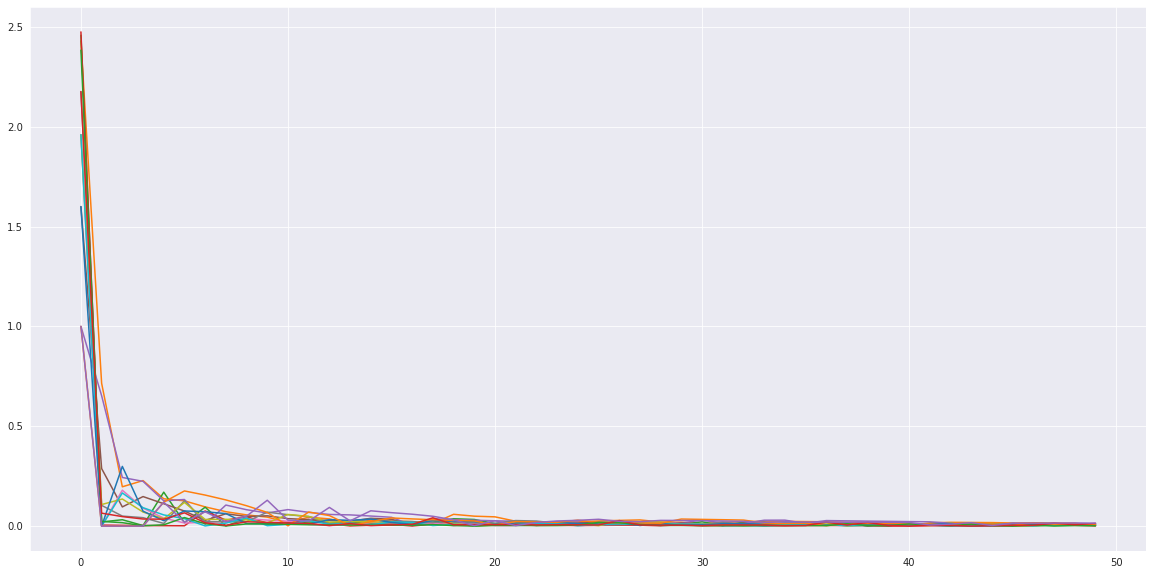

In [0]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

# Second Monte Carlo Simulation

In [0]:
# Reference: https://datascienceplus.com/how-to-apply-monte-carlo-simulation-to-forecast-stock-prices-using-python/
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [0]:
ticker = 'AAPL'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='1980-12-12')['Adj Close']

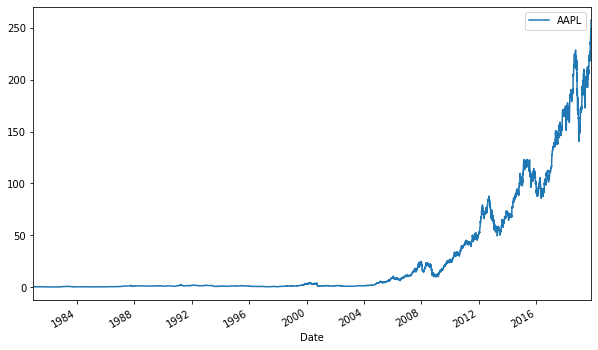

In [0]:
# Viewing historical data
data.plot(figsize=(10, 6));

                AAPL
Date                
2019-10-30 -0.000123
2019-10-31  0.022358
2019-11-01  0.027986
2019-11-04  0.006546
2019-11-05 -0.001438


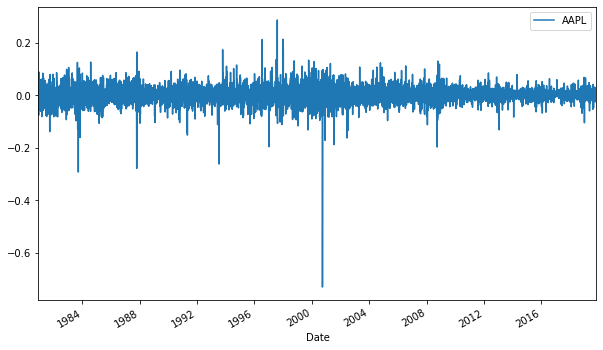

In [0]:
# Estimate the historical log returns
# Using the percent change method to obtain the simple returns from the dataset
log_returns = np.log(1 + data.pct_change())
print(log_returns.tail())

log_returns.plot(figsize = (10, 6))

The above graph shows that the returns are normally distributed and have a stable mean

In [0]:
# mean
u = log_returns.mean()
print("Mean:", u)

# variance
var = log_returns.var()
print("Variance", var)

Mean: AAPL    0.000657
dtype: float64
Variance AAPL    0.000849
dtype: float64


Brownian motion: 

1.   List item
2.   List item


r = drift + stdev * e^r

In [0]:
# compute the drift component
# it is the best approximation of future rates of return of the stock
drift = u - (0.5 * var)
print("Drift:", drift)

Drift: AAPL    0.000233
dtype: float64


In [0]:
# standard deviation of log returns
stdev = log_returns.std()
print("Standard Deviation:" , stdev)

Standard Deviation: AAPL    0.029139
dtype: float64


In [0]:
# second part of the Brownian motion is a random variable, z
# which corresponds to the distance between the mean and the events
# expressed as the number of standard deviations

# ppf - percent point function, which is another name for the quantile function
# By default, norm.ppf uses mean=0 and stddev=1, which is the "standard" normal distribution

# if an event has 95% chance of occuring, the distance betwen this event 
# and the mean will be approximately norm.ppf(0.95) standard deviations
norm.ppf(0.95)

1.6448536269514722

In [0]:
# getting a randomized multidimensional array that will insert 2 args
x = np.random.rand(10, 2)
x

array([[0.16750947, 0.43922011],
       [0.54867343, 0.07543837],
       [0.01310955, 0.48331541],
       [0.8779703 , 0.33984285],
       [0.5589    , 0.99369189],
       [0.35451116, 0.82385231],
       [0.90093534, 0.58625552],
       [0.94979708, 0.64724522],
       [0.38348249, 0.90726228],
       [0.62133786, 0.26902578]])

In [0]:
# include the random element within the ppf distribution to obtain the distance from 
# the mean corresponding to each of the randomly generated probabilities
Z = norm.ppf(x)
Z

array([[-0.96405383, -0.15294682],
       [ 0.12231047, -1.43644154],
       [-2.22295107, -0.04183427],
       [ 1.1649002 , -0.41289205],
       [ 0.1481809 ,  2.49442297],
       [-0.37316946,  0.93014623],
       [ 1.28689951,  0.2179232 ],
       [ 1.64288926,  0.37789371],
       [-0.29634715,  1.32408311],
       [ 0.30899637, -0.61576206]])

In [0]:
t_intervals = 1000
iterations = 10
# the daily returns will represent the e^r from the Brownian motion
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns


array([[0.98155035, 1.03469243, 1.00238192, ..., 0.98811719, 0.99222023,
        1.03366814],
       [0.97228056, 0.98600659, 0.97257638, ..., 1.02329166, 1.00027538,
        1.03272189],
       [1.01394726, 0.98524964, 1.0177941 , ..., 0.99780366, 1.02363268,
        1.00067203],
       ...,
       [1.00908318, 0.9606584 , 1.00543712, ..., 0.99220461, 0.94626167,
        1.01457253],
       [0.97698029, 0.95270751, 1.00024174, ..., 1.01561247, 0.99720317,
        1.04162303],
       [0.96590405, 0.94677261, 0.99153555, ..., 0.99192833, 0.94225483,
        0.98279741]])

In [0]:
# Create price list - the price list will equal the product of the price
# observed the previous day and the simulated daily return
# The first stock price used will be the last one from the dataset
S0 = data.iloc[-1]
S0



AAPL    257.130005
Name: 2019-11-05 00:00:00, dtype: float64

In [0]:
# initiating price list for the list of prices with the expected stock prices
price_list = np.zeros_like(daily_returns)

# setting the entire first row of 10 elements to S0 because that would be the 
# initial price for each of the 10 iterations we intend to generate
price_list[0] = S0
price_list


array([[257.13000488, 257.13000488, 257.13000488, ..., 257.13000488,
        257.13000488, 257.13000488],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [0]:
# generate values for the price list
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list

array([[257.13000488, 257.13000488, 257.13000488, ..., 257.13000488,
        257.13000488, 257.13000488],
       [250.00250515, 253.53187988, 250.07856866, ..., 263.1189901 ,
        257.20081253, 265.54378456],
       [253.48935415, 249.7921946 , 254.52849113, ..., 262.54109245,
        263.27915607, 265.72223851],
       ...,
       [183.12003112, 385.47771944, 116.85842054, ..., 419.92752087,
        371.78749773, 209.53284584],
       [178.90466087, 367.24751832, 116.88667   , ..., 426.48362546,
        370.74766962, 218.25423747],
       [172.80473648, 347.69989045, 115.89728862, ..., 423.04119082,
        349.3387823 , 214.49969916]])

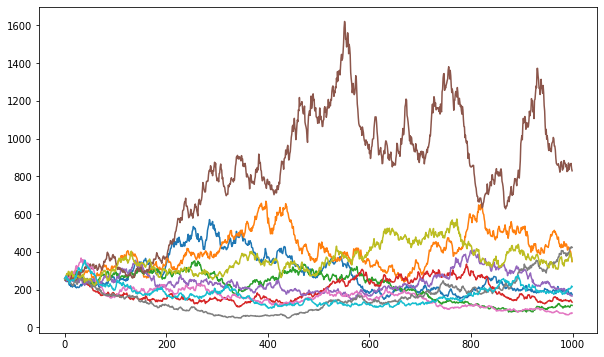

In [0]:
# visualize the 10 possible paths of the expected stock price starting from the 
# last day obtained from yahoo
plt.figure(figsize=(10,6))
plt.plot(price_list);

# Third Monte Carlo Simulation

In [0]:
# Reference: https://github.com/huseinzol05/Stock-Prediction-Models/blob/master/simulation/monte-carlo-drift.ipynb
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [0]:
ticker = 'AAPL'
df = pd.DataFrame()
df = wb.DataReader(ticker, data_source='yahoo', start='1980-12-12')

In [0]:
number_simulation = 100
predict_day = 30

close = df['Close'].tolist()
returns = pd.DataFrame(close).pct_change()
last_price = close[-30]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
daily_drift = avg_daily_ret - (variance / 2)
drift = daily_drift - 0.5 * daily_vol ** 2

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices



  0%|          | 0/100 [00:00<?, ?it/s]

  7%|▋         | 7/100 [00:00<00:01, 67.84it/s]

 14%|█▍        | 14/100 [00:00<00:01, 67.57it/s]

 21%|██        | 21/100 [00:00<00:01, 66.11it/s]

 28%|██▊       | 28/100 [00:00<00:01, 66.84it/s]

 34%|███▍      | 34/100 [00:00<00:01, 64.55it/s]

 41%|████      | 41/100 [00:00<00:00, 64.32it/s]

 48%|████▊     | 48/100 [00:00<00:00, 64.81it/s]

 55%|█████▌    | 55/100 [00:00<00:00, 65.78it/s]

 62%|██████▏   | 62/100 [00:00<00:00, 65.54it/s]

 69%|██████▉   | 69/100 [00:01<00:00, 66.54it/s]

 76%|███████▌  | 76/100 [00:01<00:00, 66.14it/s]

 83%|████████▎ | 83/100 [00:01<00:00, 65.55it/s]

 90%|█████████ | 90/100 [00:01<00:00, 65.93it/s]

 97%|█████████▋| 97/100 [00:01<00:00, 66.42it/s]

100%|██████████| 100/100 [00:01<00:00, 65.52it/s]

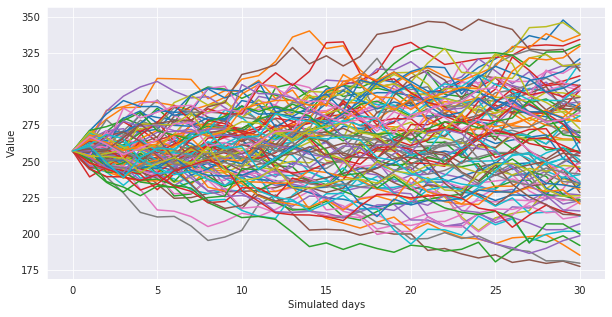

In [0]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

In [0]:
df['Close'].iloc[-30:]

Date
2019-09-25    221.029999
2019-09-26    219.889999
2019-09-27    218.820007
2019-09-30    223.970001
2019-10-01    224.589996
2019-10-02    218.960007
2019-10-03    220.820007
2019-10-04    227.009995
2019-10-07    227.059998
2019-10-08    224.399994
2019-10-09    227.029999
2019-10-10    230.089996
2019-10-11    236.210007
2019-10-14    235.869995
2019-10-15    235.320007
2019-10-16    234.369995
2019-10-17    235.279999
2019-10-18    236.410004
2019-10-21    240.509995
2019-10-22    239.960007
2019-10-23    243.179993
2019-10-24    243.580002
2019-10-25    246.580002
2019-10-28    249.050003
2019-10-29    243.289993
2019-10-30    243.259995
2019-10-31    248.759995
2019-11-01    255.820007
2019-11-04    257.500000
2019-11-05    257.130005
Name: Close, dtype: float64

In [0]:
results[:2][:30]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,...,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005,257.130005
1,260.227586,265.346849,260.516890,254.263780,257.591048,251.962116,264.106092,255.515293,266.870392,245.937727,256.104676,268.969087,256.086184,258.061359,254.322844,252.648579,257.713105,245.352471,249.139809,261.333207,251.546333,248.359403,253.189917,245.559369,262.894273,250.520369,253.334909,265.009132,260.936881,257.664738,255.772981,248.933848,252.814671,262.848447,260.184020,259.764205,263.528836,254.776809,269.014212,253.150565,...,271.165233,253.227529,258.668707,239.238579,246.851753,256.324863,259.761255,259.782543,264.902671,263.256514,254.842392,267.914033,245.373877,264.166884,265.225049,256.419543,254.171852,244.459290,253.684082,258.096782,257.780048,253.615296,271.368258,244.954956,252.526763,258.473126,261.481497,259.846198,270.632598,261.648577,258.703207,264.957661,251.213862,249.058841,257.370883,258.406557,267.070610,260.607439,253.479278,260.541299


In [0]:
mean(results.iloc[:,:30]).iloc[-2]

260.151406858983

Text(0.5, 0, 'Simulated days')

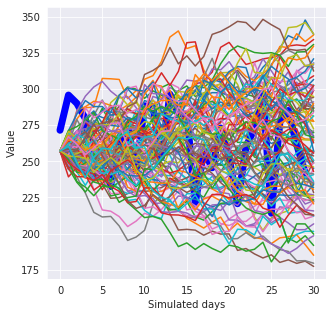

In [0]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(mean(results.iloc[:,:30]), color='b',linewidth=7.0)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')


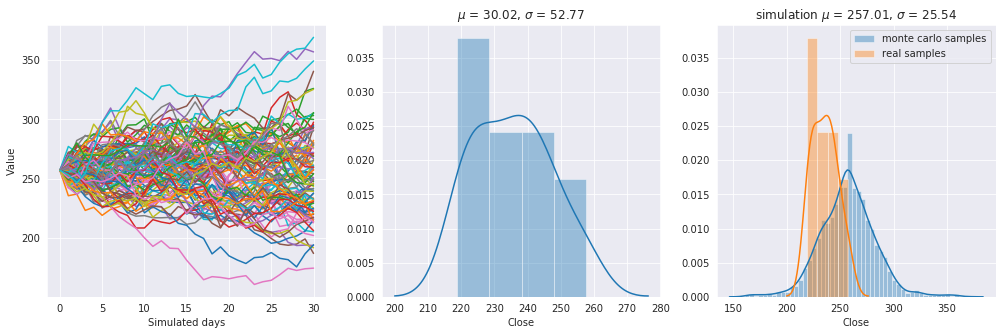

In [0]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df['Close'].iloc[-30:],norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df['Close'].iloc[-30:],norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()

# Adding Predicted Prices to DataFrame using Monte Carlo Simulation

In [0]:
# Reference: https://datascienceplus.com/how-to-apply-monte-carlo-simulation-to-forecast-stock-prices-using-python/
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
from datetime import timedelta
%matplotlib inline

(5, 6)


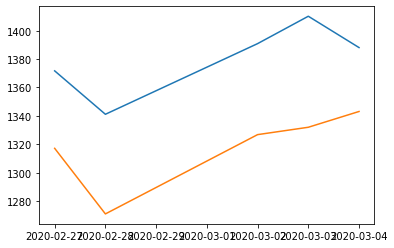

In [0]:
from pandas_datareader.data import DataReader

data = DataReader('GOOG', 'yahoo', '2020-02-27')

print(data.shape)
plt.plot(data['High'])
plt.plot(data['Low'])
plt.show()

In [0]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-27,1371.703979,1317.170044,1362.060059,1318.089966,2978300,1318.089966
2020-02-28,1341.140015,1271.000000,1277.500000,1339.329956,3790600,1339.329956
2020-03-02,1390.869995,1326.814941,1351.609985,1389.109985,2431500,1389.109985
2020-03-03,1410.150024,1332.000000,1399.420044,1341.390015,2402300,1341.390015
2020-03-04,1388.089966,1343.109985,1359.229980,1386.520020,1912600,1386.520020


In [0]:
class MonteCarlo():

    def __init__(self, df):
      self.df = df


    def monteCarloSimulation(self, days, factor):
        t_intervals = days + 1
        iterations = 100

        # Estimate the historical log returns
        # Using the percent change method to obtain the simple returns from the dataset
        log_returns = np.log(1 + self.df[[factor]].pct_change())

        # mean
        u = log_returns.mean()

        # variance
        var = log_returns.var()

        # compute the drift component
        # it is the best approximation of future rates of return of the stock
        drift = u - (0.5 * var)

        # standard deviation of log returns
        stdev = log_returns.std()

        # getting a randomized multidimensional array that will insert 2 args
        x = np.random.rand(10, 2)

        # include the random element within the ppf distribution to obtain the distance from 
        # the mean corresponding to each of the randomly generated probabilities
        Z = norm.ppf(x)

        # the daily returns will represent the e^r from the Brownian motion
        daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

        # Create price list - the price list will equal the product of the price
        # observed the previous day and the simulated daily return
        # The first stock price used will be the last one from the dataset
        S0 = self.df[[factor]].iloc[-1]

        # initiating price list for the list of prices with the expected stock prices
        price_list = np.zeros_like(daily_returns)

        # setting the entire first row of 10 elements to S0 because that would be the 
        # initial price for each of the 10 iterations we intend to generate
        price_list[0] = S0

        # generate values for the price list
        for t in range(1, t_intervals):
            price_list[t] = price_list[t - 1] * daily_returns[t]

        # looks 'days' amount ahead for simulation
        sim = np.mean(price_list[days])
        return sim

    def addPredictedPricesToDF(self, days):
      f = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

      for i in range(1, days+1):
        add_df = pd.DataFrame({
                                "High": [self.monteCarloSimulation(i, f[0])],
                                "Low":[self.monteCarloSimulation(i, f[1])],
                                "Open":[self.monteCarloSimulation(i, f[2])],
                                "Close":[self.monteCarloSimulation(i, f[3])],
                                "Volume":[self.monteCarloSimulation(i, f[4])],
                                "Adj Close":[self.monteCarloSimulation(i, f[5])]
                              }, index = self.df.iloc[[-1]].index + timedelta(days=1))
        
        self.df = self.df.append(add_df)
        




In [0]:
mc = MonteCarlo(data)
mc.addPredictedPricesToDF(2)
mc.df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-27,1371.703979,1317.170044,1362.060059,1318.089966,2.978300e+06,1318.089966
2020-02-28,1341.140015,1271.000000,1277.500000,1339.329956,3.790600e+06,1339.329956
2020-03-02,1390.869995,1326.814941,1351.609985,1389.109985,2.431500e+06,1389.109985
2020-03-03,1410.150024,1332.000000,1399.420044,1341.390015,2.402300e+06,1341.390015
2020-03-04,1388.089966,1343.109985,1359.229980,1386.520020,1.912600e+06,1386.520020
2020-03-05,1389.329256,1349.667627,1357.496370,1409.769326,1.690040e+06,1402.242603
2020-03-06,1393.765805,1358.396670,1350.441018,1452.667521,1.437588e+06,1438.104542
